Following in spirit of the [SageManifold guide](https://nbviewer.jupyter.org/github/egourgoulhon/BHLectures/blob/master/sage/conformal_Minkowski.ipynb).

# Minkowski Spacetime
This notebook will investigate features of Minkowski 3+1 spacetime, in an effort to learn more of the SageManifold library.

In [56]:
%display latex

Let us start by declaring a spherical manifold in four dimensions. We do not have to provide any coordinate information to create a manifold instance, but in order to specify the coordinate system we wish to use, we require a *chart*:

In [57]:
M = Manifold(4, r'\mathcal{M}')
print(M)

4-dimensional differentiable manifold \mathcal{M}


We define a chart $(\mathcal{M}, \varphi)$ on manifold M such that
$$
\varphi : \mathcal{M} \rightarrow K \subset F^n,
$$
is a homeomorphism from $\mathcal{M}$ into an open subset $K$ of the field $F^n$, on which the manifold is defined. The action is explicity from the components of $\varphi$, denoted $(x^1, ..., x^n)$, through
$$
p \mapsto\left(x^1(p), ..., x^n(p) \right).
$$

These components are the *coordinates* of the chart $(\mathcal{M}, \varphi)$.

In [58]:
chart_def = r't r:(0,+oo) theta:(o,pi):\theta phi:(0,2*pi):\phi'
SC.<t, r, theta, phi> = M.chart(chart_def)
SC

Chart (\mathcal{M}, (t, r, theta, phi))

In [59]:
SC.coord_range()

t: (-oo, +oo); r: (0, +oo); theta: (o, pi); phi: (0, 2*pi)

In [60]:
M.atlas()

[Chart (\mathcal{M}, (t, r, theta, phi))]

We can specify a metric on this manifold of Lorentz symmetry with

In [61]:
g = M.lorentzian_metric('g')
g[0, 0] = -1
g[1, 1] = 1
g[2, 2] = r^2
g[3, 3] = r^2 * sin(theta)^2

g.display()

g = -dt*dt + dr*dr + r^2 dtheta*dtheta + r^2*sin(theta)^2 dphi*dphi

## Null Coordinates
We introduce null coordinates: *retarded time* $u=t-r$, and *advanced time* $v = t+r$. A null coordinate $x$ is a coordinate for which the one-form $\text{d}x$ has zero norm. This has the consequence that the metric gives a null value along the coordinate axes, which may be interpreted as the path of light.

We specify this new chart on our manifold with:

In [62]:
chart_def = r"u v theta:(0,pi):\theta phi:(0,2*pi):\phi"
SN.<u, v, theta, phi> = M.chart(chart_def)
SN

Chart (\mathcal{M}, (u, v, theta, phi))

In [63]:
SN.frame()

Coordinate frame (\mathcal{M}, (d/du,d/dv,d/dtheta,d/dphi))

In [76]:
M.atlas()

[Chart (\mathcal{M}, (t, r, theta, phi)),
 Chart (\mathcal{M}, (u, v, theta, phi)),
 Chart (\mathcal{M}, (U, V, theta, phi))]

We then define a transition map between the two atlases:

In [65]:
SC2SN = SC.transition_map(SN, [t-r, t+r, theta, phi])
SC2SN.display()

u = -r + t
v = r + t
theta = theta
phi = phi

And get the inverse for free:

In [66]:
SC2SN.inverse().display()

t = 1/2*u + 1/2*v
r = -1/2*u + 1/2*v
theta = theta
phi = phi

We can also calculate how the metric in the new null coordinates translates:

In [67]:
g.display(SN.frame(), SN)

g = -1/2 du*dv - 1/2 dv*du + (1/4*u^2 - 1/2*u*v + 1/4*v^2) dtheta*dtheta + (1/4*u^2*sin(theta)^2 - 1/2*u*v*sin(theta)^2 + 1/4*v^2*sin(theta)^2) dphi*dphi

We can even simply plot the coordinate grid of $(u, v)$ in the null chart in terms of the coordinates of the spherical chart $(t, r)$ with:

In [70]:
graph = SN.plot(
    SC,
    ambient_coords=(r,t),
    fixed_coords={theta: 0, phi: 0},
    number_values=17,
    plot_points=200,
    style={u: '-', v: ':'}
)
show(graph) # why is it allowing r < 0 ??

## Compactified Null Coordinates
We will add another chart to our manifol, this one consisting of the coordinates $U = \arctan(u)$ and $V = \arctan(v)$, spanning $\left( -\pi/2, \pi/2 \right)$:

In [71]:
chart_def = r'U:(-pi/2,pi/2) V:(-pi/2,pi/2) theta:(0,pi):\theta phi:(0,2*pi):\phi'
SCN.<U, V, theta, phi> = M.chart(chart_def)
SCN

Chart (\mathcal{M}, (U, V, theta, phi))

In [72]:
SCN.coord_range()

U: (-1/2*pi, 1/2*pi); V: (-1/2*pi, 1/2*pi); theta: (0, pi); phi: (0, 2*pi)

In [77]:
SN2SCN = SN.transition_map(SCN, [atan(u), atan(v), theta, phi])
SN2SCN.display()

U = arctan(u)
V = arctan(v)
theta = theta
phi = phi

SageManifold will not anticipate our desires; we need to explicitly calculate our ingredients for a given result For example, to show the metric on this chart we require the inverse transformation also:

In [85]:
SN2SCN.inverse().display()

u = sin(U)/cos(U)
v = sin(V)/cos(V)
theta = theta
phi = phi

Now we can calculate the metric tensor in these coordinates in the same way as before:

In [87]:
g.display(SCN.frame(), SCN)

g = -1/2/(cos(U)^2*cos(V)^2) dU*dV - 1/2/(cos(U)^2*cos(V)^2) dV*dU + 1/4*(cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)/(cos(U)^2*cos(V)^2) dtheta*dtheta + 1/4*(cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)*sin(theta)^2/(cos(U)^2*cos(V)^2) dphi*dphi

We introduce notation $\Omega^-2$ as the common factor in this metric:

In [88]:
Omega = M.scalar_field(
    {SCN: 2*cos(U)*cos(V)},
    name='Omega',
    latex_name=r'\Omega'
)
Omega.display()

Omega: \mathcal{M} --> R
   (u, v, theta, phi) |--> 2/(sqrt(u^2 + 1)*sqrt(v^2 + 1))
   (U, V, theta, phi) |--> 2*cos(U)*cos(V)

Note that with the mappings between different charts defined allowed SageMath to automatically calculate necessary coordinate mappings from the manifold to $\mathbb{R}$. We can demonstrate this further:

In [89]:
Omega.display(SC)

Omega: \mathcal{M} --> R
   (t, r, theta, phi) |--> 2/(sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1))

## Conformal metric
*Conformal* in this context means angle preserving; we introduce
$$
\tilde{g} = \Omega^2 g.
$$

In [92]:
gt = M.lorentzian_metric('gt', latex_name=r'\tilde{g}')
gt.set(Omega^2 * g) # metric from a field of symmetric bilinear forms
gt.display(SCN.frame(), SCN)

gt = -2 dU*dV - 2 dV*dU + (cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2) dtheta*dtheta + (cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)*sin(theta)^2 dphi*dphi

We can simplify some of the metric components further. We use `expr()` to extract the symbolic representation:

In [100]:
g22 = gt[SCN.frame(), 2, 2, SCN].expr()
display(g22)

cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2

In [110]:
g22 = g22.factor().reduce_trig()
g22

sin(-U + V)^2

In [112]:
g33 = gt[SCN.frame(), 3, 3, SCN].expr()
g33

(cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)*sin(theta)^2

In [113]:
g33 = g33 / sin(theta)^2 # further simplifies next computation
g33 = g33.factor().reduce_trig() * sin(theta)^2
g33 

sin(-U + V)^2*sin(theta)^2

Now we can add the fully simplified components back into the metric expression:

In [114]:
gt.add_comp(SCN.frame())[2, 2, SCN] = g22
gt.add_comp(SCN.frame())[3, 3, SCN] = g33

gt.display(SCN.frame(), SCN)

gt = -2 dU*dV - 2 dV*dU + sin(-U + V)^2 dtheta*dtheta + sin(-U + V)^2*sin(theta)^2 dphi*dphi

## Einstein static universe coordinates
The *Einstein Static Universe* is the topology of $\mathbb{R} \times \mathbb{S}^3$; surpressing $\mathbb{S}^2$, it is represented by an infinite cylinder, with length corresponding to the time direction.

For this, we introduce coordinates $(\tau, \chi)$, such that the compact null coordinates $(U, V)$ are *half the retarded time* $\tau - \chi$, and half the advanced time $\tau + \chi$.

In [119]:
chart_def = r'tau:(-pi,pi):\tau chi:(0,pi):\chi theta:(0,pi):\theta phi:(0,2*pi):\phi'
EC.<tau, chi, theta, phi> = M.chart(chart_def)
EC.add_restrictions([tau < pi - chi, tau > chi - pi])
EC

Chart (\mathcal{M}, (tau, chi, theta, phi))

In [120]:
EC.coord_range()

tau: (-pi, pi); chi: (0, pi); theta: (0, pi); phi: (0, 2*pi)

In [126]:
EC2SCN = EC.transition_map(
    SCN,
    [(tau - chi)/2, (tau + chi)/2, theta, phi]
)
EC2SCN.inverse()
EC2SCN.display()

U = -1/2*chi + 1/2*tau
V = 1/2*chi + 1/2*tau
theta = theta
phi = phi

Conformal metric of the Einstein Cylinder $\mathbb{R} \times \mathbb{S}^3$:

In [123]:
gt.display(EC.frame(), EC)

gt = -dtau*dtau + dchi*dchi + sin(chi)^2 dtheta*dtheta + sin(chi)^2*sin(theta)^2 dphi*dphi

And the square of the conformal factor expressed in the every coordinate system defined:

In [124]:
(Omega^2).display()

Omega^2: \mathcal{M} --> R
   (t, r, theta, phi) |--> 4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1)
   (u, v, theta, phi) |--> 4/((u^2 + 1)*v^2 + u^2 + 1)
   (U, V, theta, phi) |--> 4*cos(U)^2*cos(V)^2
   (tau, chi, theta, phi) |--> 4*cos(1/2*chi)^4*cos(1/2*tau)^4 - 8*cos(1/2*chi)^2*cos(1/2*tau)^2*sin(1/2*chi)^2*sin(1/2*tau)^2 + 4*sin(1/2*chi)^4*sin(1/2*tau)^4

String together maps:

In [164]:
SC2EC = M.coord_change(SCN, EC) \
    * M.coord_change(SN, SCN) \
    * M.coord_change(SC, SN) # read in reverse
SC2EC.display()

tau = arctan(r + t) + arctan(-r + t)
chi = arctan(r + t) - arctan(-r + t)
theta = theta
phi = phi

SageManifold wont be able to find a simple inverse for this mapping, however we can define one:

In [133]:
EC2SC = M.coord_change(SN, SC) \
    * M.coord_change(SCN, SN) \
    * M.coord_change(EC, SCN)
EC2SC.display()

t = cos(1/2*tau)*sin(1/2*tau)/(cos(1/2*chi)^2*cos(1/2*tau)^2 - sin(1/2*chi)^2*sin(1/2*tau)^2)
r = cos(1/2*chi)*sin(1/2*chi)/(cos(1/2*chi)^2*cos(1/2*tau)^2 - sin(1/2*chi)^2*sin(1/2*tau)^2)
theta = theta
phi = phi

This can be simplified:

In [141]:
tc, rc, _, _ = EC2SC(tau, chi, theta, phi)
tc

cos(1/2*tau)*sin(1/2*tau)/(cos(1/2*chi)^2*cos(1/2*tau)^2 - sin(1/2*chi)^2*sin(1/2*tau)^2)

In [144]:
tc = tc.reduce_trig()
tc

sin(tau)/(cos(chi) + cos(tau))

In [145]:
rc = rc.reduce_trig()
rc

sin(chi)/(cos(chi) + cos(tau))

In [147]:
SC2EC.set_inverse(tc, rc, theta, phi)
EC2SC = SC2EC.inverse()
EC2SC.display()

Check of the inverse coordinate transformation:
  t == t  *passed*
  r == r  *passed*
  theta == theta  *passed*
  phi == phi  *passed*
  tau == arctan((sin(chi) + sin(tau))/(cos(chi) + cos(tau))) + arctan(-(sin(chi) - sin(tau))/(cos(chi) + cos(tau)))  **failed**
  chi == arctan((sin(chi) + sin(tau))/(cos(chi) + cos(tau))) - arctan(-(sin(chi) - sin(tau))/(cos(chi) + cos(tau)))  **failed**
  theta == theta  *passed*
  phi == phi  *passed*
NB: a failed report can reflect a mere lack of simplification.


t = sin(tau)/(cos(chi) + cos(tau))
r = sin(chi)/(cos(chi) + cos(tau))
theta = theta
phi = phi

## Conformal Penrose Diagram
We draw $(t, r)$ in terms of the coordinates $(\tau, \chi)$. First, we will define the limits of spacetime and points of interest:

In [185]:
graph_i0 = circle((pi,0), 0.05, fill=True, color='grey') + \
           text(r"$i^0$", (3.3, 0.2), fontsize=18, color='grey') 
graph_ip = circle((0,pi), 0.05, fill=True, color='red') + \
           text(r"$i^+$", (0.25, 3.3), fontsize=18, color='grey')
graph_im = circle((0,-pi), 0.05, fill=True, color='red') + \
           text(r"$i^-$", (0.25, -3.3), fontsize=18, color='grey')
graph_Ip = line([(0,pi), (pi,0)], color='green', thickness=2) + \
           text(r"$\mathscr{I}^+$", (1.8, 1.8), fontsize=18, color='blue')
graph_Im = line([(0,-pi), (pi,0)], color='green', thickness=2) + \
           text(r"$\mathscr{I}^-$", (1.8, -1.8), fontsize=18, color='blue')

Now we can construct the diagram:

In [186]:
conformal_graph = SC.plot(
    EC,
    ambient_coords=(chi, tau),
    fixed_coords={theta: pi/2, phi: pi},
    max_range=30, 
    number_values=51, 
    plot_points=250,
    color={t: 'red', r:'green'}
)

conformal_graph += graph_i0 + graph_ip + graph_im + graph_Ip + graph_Im

show(conformal_graph)

The values blow up near infinitity, and in our current configuration for the plot, seem to terminate before reaching the limit of $\chi$:

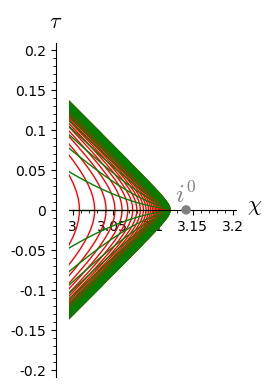

In [183]:
zoom_conformal_graph = SC.plot(
    EC,
    ambient_coords=(chi, tau),
    fixed_coords={theta: pi/2, phi: pi},
    max_range=100, 
    number_values=41, 
    plot_points=200,
    color={t: 'red', r:'green'}
)
zoom_conformal_graph += circle(
    (pi,0), 0.005, fill=True, color='grey'
)
zoom_conformal_graph += text(
    r"$i^0$", (pi, 0.02), fontsize=18, color='grey'
) 
show(
    zoom_conformal_graph,
    xmin=3.0,
    xmax=3.2,
    ymin=-0.2,
    ymax=0.2,
    aspect_ratio=1
)

To investigate this further, we can use a new set of coordinates, namely the *logarithmic radial* coordinate:

In [152]:
chart_def = r't rho:\rho theta:(0,pi):\theta phi:(0,2*pi):\phi'
LC.<t, rho, theta, phi> = M.chart(chart_def)
LC

Chart (\mathcal{M}, (t, rho, theta, phi))

In [154]:
SC2LC = SC.transition_map(LC, [t, ln(r), theta, phi])
SC2LC.display()

t = t
rho = log(r)
theta = theta
phi = phi

In [155]:
SC2LC.inverse().display()

t = t
r = e^rho
theta = theta
phi = phi

We now have a total coordinate change:

In [179]:
M.coord_change(EC, LC).display()

t = sin(tau)/(cos(chi) + cos(tau))
rho = log(sin(chi)/(cos(chi) + cos(tau)))
theta = theta
phi = phi

Which we can plot with:

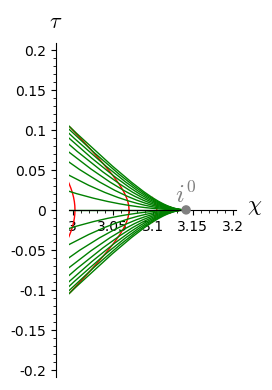

In [170]:
LC2EC = M.coord_change(SC, EC) * M.coord_change(LC, SC)
EC2LC = M.coord_change(SC, LC) * M.coord_change(EC, SC)

log_conformal_graph = LC.plot(
    EC,
    ambient_coords=(chi, tau),
    fixed_coords={theta: pi/2, phi: pi},
    ranges={t: (-20, 20), rho: (-2, 10)},
    number_values=19,
    color={t: 'red', rho: 'green'}
)
log_conformal_graph += circle(
    (pi,0), 0.005, fill=True, color='grey'
)
log_conformal_graph += text(
    r"$i^0$", (pi, 0.02), fontsize=18, color='grey'
) 

show(
    log_conformal_graph, 
    xmin=3.0, xmax=3.2, 
    ymin=-0.2, ymax=0.2, 
    aspect_ratio=1
)

## Null radial geodesics
We can obtain a view of radial null geodescics in the conformal diagram by plotting the chart $(\mathcal{M},(u, v, \theta, \phi))$ in terms of the chart $(\mathcal{M},(\tau, \chi, \theta, \phi))$. We represent the geodesics defined by 
$$
(u, \theta, \phi) = (u_0, \pi/2, \pi)\text{ for different }u_0, \\
(v, \theta, \phi) = (v_0, \pi/2, \pi)\text{ for different }v_0.
$$

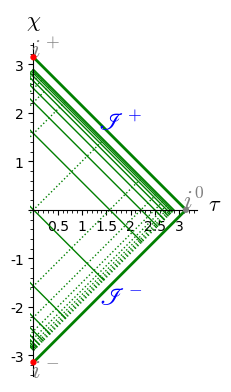

In [190]:
graph_sn = SN.plot(
    EC,
    ambient_coords=(tau, chi),
    fixed_coords={theta: pi/2, phi: pi},
    number_values=17,
    plot_points=150,
    color='green',
    style={u: '-', v:':'}
)
graph_sn += graph_i0 + graph_ip + graph_im + graph_Ip + graph_Im
show(graph_sn, xmin=0)

The geodesics don't approach $\mathscr{I}^+$, or $\mathscr{I}^-$, since we are only plotting a limited number.

## Conformal factor
We express $\Omega$ is all our coordinate frames:

In [191]:
Omega.display()

Omega: \mathcal{M} --> R
   (t, r, theta, phi) |--> 2/(sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1))
   (u, v, theta, phi) |--> 2/(sqrt(u^2 + 1)*sqrt(v^2 + 1))
   (U, V, theta, phi) |--> 2*cos(U)*cos(V)
   (tau, chi, theta, phi) |--> 2*cos(1/2*chi)^2*cos(1/2*tau)^2 - 2*sin(1/2*chi)^2*sin(1/2*tau)^2
   (t, rho, theta, phi) |--> 2/(sqrt(t^2 + 2*t*e^rho + e^(2*rho) + 1)*sqrt(t^2 - 2*t*e^rho + e^(2*rho) + 1))

We notice the expression in $(\tau, \chi, \theta, \phi)$ can be simplified:

In [192]:
Omega.expr(EC)

2*cos(1/2*chi)^2*cos(1/2*tau)^2 - 2*sin(1/2*chi)^2*sin(1/2*tau)^2

In [195]:
(Omega.expr(EC) - cos(tau) - cos(chi)).trig_reduce()

0

We modify the expression in $\Omega$ with:

In [196]:
Omega.add_expr(cos(tau) + cos(chi), EC)
Omega.display()

Omega: \mathcal{M} --> R
   (t, r, theta, phi) |--> 2/(sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1))
   (u, v, theta, phi) |--> 2/(sqrt(u^2 + 1)*sqrt(v^2 + 1))
   (U, V, theta, phi) |--> 2*cos(U)*cos(V)
   (tau, chi, theta, phi) |--> cos(chi) + cos(tau)
   (t, rho, theta, phi) |--> 2/(sqrt(t^2 + 2*t*e^rho + e^(2*rho) + 1)*sqrt(t^2 - 2*t*e^rho + e^(2*rho) + 1))

We plot $\Omega$ in terms of the coordinates $(\tau, \chi)$. Recall that $\Omega$ stems from a scaling for the metric $\tilde{g}$.

In [214]:
graph = plot3d(
    Omega.expr(EC),
    (tau, -pi, pi),
    (chi, 0, pi),
    color='grey'
) + plot3d(
    0,
    (tau, -pi, pi),
    (chi, 0, pi),
    color='yellow', 
    opacity=0.5
)

show(graph, aspect_ratio=1, viewer="threejs", online=True, axes_labels=['tau', 'chi', ''])

Graphics3d Object

### Differential of the conformal facto
The differential $\text{d}\Omega$ 1-form is:

In [216]:
dOmega = Omega.differential()
dOmega.display()

dOmega = -4*(t^3 - (r^2 - 1)*t)*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)/(r^8 + t^8 - 4*(r^2 - 1)*t^6 + 4*r^6 + 2*(3*r^4 - 2*r^2 + 3)*t^4 + 6*r^4 - 4*(r^6 + r^4 - r^2 - 1)*t^2 + 4*r^2 + 1) dt - 4*(r^3 - r*t^2 + r)*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)/(r^8 + t^8 - 4*(r^2 - 1)*t^6 + 4*r^6 + 2*(3*r^4 - 2*r^2 + 3)*t^4 + 6*r^4 - 4*(r^6 + r^4 - r^2 - 1)*t^2 + 4*r^2 + 1) dr

In [220]:
print(dOmega)

1-form dOmega on the 4-dimensional differentiable manifold \mathcal{M}


We can display the form in different frames also:

In [221]:
dOmega.display(SCN.frame(), SCN)

dOmega = -2*cos(V)*sin(U) dU - 2*cos(U)*sin(V) dV

We will update the default chart to being the compact null coordinates:

In [222]:
M.set_default_chart(SCN)
M.set_default_frame(SCN.frame())
dOmega.display()

dOmega = -2*cos(V)*sin(U) dU - 2*cos(U)*sin(V) dV

We can alternatively define a 1-form on our manifold, and insert components by hand:

In [223]:
dOmega1 = M.one_form()
dOmega1[0] = -2 * cos(V) * sin(U)
dOmega1[1] = -2 * cos(U) * sin(V)
dOmega1.display()

-2*cos(V)*sin(U) dU - 2*cos(U)*sin(V) dV

And display it on different frames:

In [224]:
dOmega1.display(EC.frame(), EC)

-2*cos(1/2*tau)*sin(1/2*tau) dtau - 2*cos(1/2*chi)*sin(1/2*chi) dchi

## Einstein static universe
We will now define a new manifold in which we define the Einstein static universe chart:

In [225]:
E = Manifold(4, 'E')
print(E)

4-dimensional differentiable manifold E


In [240]:
chart_def = r"tau:\tau chi:(0,pi):\chi theta:(0,pi):\theta phi:(0,2*pi):\phi"
XE.<tau, chi, theta, phi> = E.chart(chart_def)
XE

Chart (E, (tau, chi, theta, phi))

Note that the coordinate range differs between this chart and the Einstein static universe defined on the previous manifold in terms of the coordinate range:

In [241]:
XE.coord_range()

tau: (-oo, +oo); chi: (0, pi); theta: (0, pi); phi: (0, 2*pi)

In [242]:
EC.coord_range()

tau: (-pi, pi); chi: (0, pi); theta: (0, pi); phi: (0, 2*pi)

## Embedding of $\mathcal{M}$ in $E$
Let us examine how we can create a map from $\mathcal{M}$ to $E$ in SageManifold:

In [243]:
M2E = M.diff_map(
    E, 
    {(EC, XE): [tau, chi, theta, phi]},
    name="m2e",
    latex_name=r"\Phi"
)
print(M2E)
M2E.display()

Differentiable map m2e from the 4-dimensional differentiable manifold \mathcal{M} to the 4-dimensional differentiable manifold E


m2e: \mathcal{M} --> E
   (t, r, theta, phi) |--> (tau, chi, theta, phi) = (arctan(r + t) + arctan(-r + t), arctan(r + t) - arctan(-r + t), theta, phi)
   (u, v, theta, phi) |--> (tau, chi, theta, phi) = (arctan(u) + arctan(v), -arctan(u) + arctan(v), theta, phi)
   (U, V, theta, phi) |--> (tau, chi, theta, phi) = (U + V, -U + V, theta, phi)
   (tau, chi, theta, phi) |--> (tau, chi, theta, phi) = (tau, chi, theta, phi)
   (t, rho, theta, phi) |--> (tau, chi, theta, phi) = (arctan(t + e^rho) + arctan(t - e^rho), arctan(t + e^rho) - arctan(t - e^rho), theta, phi)

Notice that by defining a single translation between the two Einstein static universe charts, SageManifold has automatically calculates all relevent element mappings in $\mathcal{M}$ to $E$.

We can plot one chart in $\mathcal{M}$ in terms of the coordinates of a chart in $E$ by passing the map as a keyword argument:

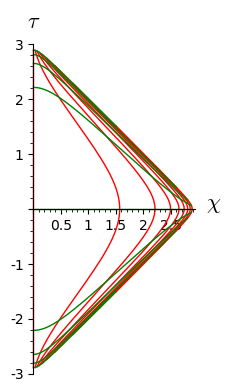

In [245]:
SC.plot(
    XE, 
    mapping=M2E, 
    ambient_coords=(chi, tau), 
    fixed_coords={theta: pi/2, phi: pi},
    plot_points=200,
    color={t: 'red', r: 'green'}
)

## Embedding of $E$ in $\mathbb{R}^5$
We can perform the same actions on a new manifold $\mathbb{R}^5$:

In [246]:
R5 = Manifold(5,'R^5', latex_name=r"\mathbb{R}^5")
print(R5)

5-dimensional differentiable manifold R^5


In [247]:
X5.<tau, W, X, Y, Z> = R5.chart(r"tau:\tau W X Y Z")
X5

Chart (R^5, (tau, W, X, Y, Z))

And create a map from $E$ to $\mathbb{R}^5$:

In [248]:
E2R5 = E.diff_map(
    R5,
    {(XE, X5): [
        tau,
        cos(chi),
        sin(chi) * sin(theta) * cos(phi), # modified cylindrical coordinates
        sin(chi) * sin(theta) * sin(phi),
        sin(chi) * cos(theta)
    ]},
    name="E2R5",
    latex_name=r"\Psi"
)
print(E2R5)
E2R5.display()

Differentiable map E2R5 from the 4-dimensional differentiable manifold E to the 5-dimensional differentiable manifold R^5


E2R5: E --> R^5
   (tau, chi, theta, phi) |--> (tau, W, X, Y, Z) = (tau, cos(chi), cos(phi)*sin(chi)*sin(theta), sin(chi)*sin(phi)*sin(theta), cos(theta)*sin(chi))

And represent the Einstein cylinder; according to [this Physics-SE answer](https://math.stackexchange.com/questions/1781221/why-is-the-einstein-static-universe-an-infinite-cylinder#1781716), the best way to *read* the diagram is to think of each circular slice as a covering of $S^2$, i.e. spatial spacetime, and the vertical axis is time. 

In [256]:
graphE = XE.plot(# phi = 0, i.e. one half of the cylinder
    X5, 
    ambient_coords=(W,X,tau), 
    mapping=E2R5, 
    fixed_coords={theta: pi/2, phi: 0.001}, 
    max_range=4, 
    number_values=9, 
    color='silver', 
    thickness=0.5,
    label_axes=False
)
graphE += XE.plot(# phi = pi, i.e. the other half of the cylinder
    X5, 
    ambient_coords=(W,X,tau), 
    mapping=E2R5, 
    fixed_coords={theta: pi/2, phi: pi}, 
    max_range=4, 
    number_values=9, 
    color='silver', 
    thickness=0.5,
    label_axes=False
) 
show(graphE, aspect_ratio=1, viewer="threejs", online=True, axes_labels=['W', 'X', 'tau'])

Graphics3d Object

## Embedding of $\mathcal{M}$ in $\mathbb{R}^5$
We can compose $\Phi: \mathcal{M} \rightarrow E $ and $\Psi : E \rightarrow \mathbb{R}^5$ into an embedding 
$$
\Theta: \mathcal{M} \rightarrow \mathbb{R}^5
$$

In [260]:
M2R5 = E2R5 * M2E
print(M2R5)
M2R5.display()

Differentiable map from the 4-dimensional differentiable manifold \mathcal{M} to the 5-dimensional differentiable manifold R^5


\mathcal{M} --> R^5
   (t, r, theta, phi) |--> (tau, W, X, Y, Z) = (arctan(r + t) + arctan(-r + t), -sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*(r^2 - t^2 - 1)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*cos(phi)*sin(theta)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*sin(phi)*sin(theta)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*cos(theta)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1))
   (u, v, theta, phi) |--> (tau, W, X, Y, Z) = (arctan(u) + arctan(v), sqrt(u^2 + 1)*(u*v + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), -(u*cos(phi)*sin(theta) - v*cos(phi)*sin(theta))*sqrt(u^2 + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), -(u*sin(phi)*sin(theta) - v*sin(phi)*sin(theta))*sqrt(u^2 + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), -sqrt(u^2 + 1)*sqrt(v^2 + 1)*(u*cos(theta) - v*cos(theta))/((u^2 + 1)*v^2 + u^2 + 1))
   (U, V, theta, phi) |--> (tau, W, X, Y, Z) = (U + V, cos(U)*cos(V) + sin(U)*sin(V), -(cos(V)*sin(U) - cos(U)*sin(V))*cos(phi)*sin(theta), -(cos(V)*sin(U) - cos(U)*sin(V))*sin(phi)*sin(theta), -(cos(V)*sin(U) - cos(U)*sin(V))*cos(theta))
   (tau, chi, theta, phi) |--> (tau, W, X, Y, Z) = (tau, cos(chi), cos(phi)*sin(chi)*sin(theta), sin(chi)*sin(phi)*sin(theta), cos(theta)*sin(chi))
   (t, rho, theta, phi) |--> (tau, W, X, Y, Z) = (arctan(t + e^rho) + arctan(t - e^rho), sqrt(t^2 + 2*t*e^rho + e^(2*rho) + 1)*sqrt(t^2 - 2*t*e^rho + e^(2*rho) + 1)*(t^2 - e^(2*rho) + 1)/(t^4 - 2*t^2*(e^(2*rho) - 1) + e^(4*rho) + 2*e^(2*rho) + 1), 2*sqrt(t^2 + 2*t*e^rho + e^(2*rho) + 1)*sqrt(t^2 - 2*t*e^rho + e^(2*rho) + 1)*cos(phi)*e^rho*sin(theta)/(t^4 - 2*t^2*(e^(2*rho) - 1) + e^(4*rho) + 2*e^(2*rho) + 1), 2*sqrt(t^2 + 2*t*e^rho + e^(2*rho) + 1)*sqrt(t^2 - 2*t*e^rho + e^(2*rho) + 1)*e^rho*sin(phi)*sin(theta)/(t^4 - 2*t^2*(e^(2*rho) - 1) + e^(4*rho) + 2*e^(2*rho) + 1), 2*sqrt(t^2 + 2*t*e^rho + e^(2*rho) + 1)*sqrt(t^2 - 2*t*e^rho + e^(2*rho) + 1)*cos(theta)*e^rho/(t^4 - 2*t^2*(e^(2*rho) - 1) + e^(4*rho) + 2*e^(2*rho) + 1))

And now plot the conformal diagram represented on the Einstein cylinder:

In [275]:
graphM = sum([SC.plot(# phi = 0
    X5,
    ambient_coords=(W, X, tau),
    mapping=M2R5,
    fixed_coords={theta: pi/2, phi:i},
    max_range=30,
    number_values=51, 
    plot_points=250,
    color={t:'red', r:'black'},
    label_axes=False
) for i in [0.001, pi]])

And show it with the cylinder:

In [276]:
show(graphE + graphM, aspect_ratio=1, viewer="threejs", online=True, axes_labels=['W', 'X', 'tau'])

Graphics3d Object